# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude).
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [27]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

In [28]:
#create a DF with the city from above, and empty columns for placeholders
cities_df = pd.DataFrame(cities)

cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""
cities_df = cities_df.rename(columns={0 : "City"})
cities_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barentsburg,,,,,,,,
1,mar del plata,,,,,,,,
2,cape town,,,,,,,,
3,albany,,,,,,,,
4,vostok,,,,,,,,
5,lata,,,,,,,,
6,punta arenas,,,,,,,,
7,kargopol,,,,,,,,
8,saskylakh,,,,,,,,
9,pimentel,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [29]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

counter = 1
total_records = len(cities_df)
city_not_found_counter = 0

#loop through data, add json data to DF
for index, row in cities_df.iterrows():
    city = row["City"]
    query_url = f"{url}appid={api_key}&units={units}&q={city}"
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #handle error if city is not found
    if weather_json["cod"] == "404":
        print("Processing record " + str(counter) + " of " + str(total_records) + ". CITY '" + row["City"].upper() + "' NOT FOUND, moving on to next record.")
        print("=======================================================================")
        counter += 1
        city_not_found_counter += 1
    else:
        print("Processing record " + str(counter) + " of " + str(total_records) + ".  City name: " + row["City"])
        print("URL: " + query_url)
        print("=======================================================================")
        #cities_df.set_value(index, "City", weather_json["name"])
        cities_df.loc[index, "Cloudiness"]  = weather_json["clouds"]["all"]
        cities_df.loc[index, "Country"]     = weather_json["sys"]["country"]
        cities_df.loc[index, "Date"]        = weather_json["dt"]
        cities_df.loc[index, "Humidity"]    = weather_json["main"]["humidity"]
        cities_df.loc[index, "Lat"]         = weather_json["coord"]["lat"]
        cities_df.loc[index, "Lng"]         = weather_json["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]    = weather_json["main"]["temp_max"]
        cities_df.loc[index, "Wind Speed"]  = weather_json["wind"]["speed"]
        counter += 1
#end of report detail
print("\nCount, cities not found: " + str(city_not_found_counter))
print("\n*** END OF PROCESSING ***")


Processing record 1 of 624. CITY 'BARENTSBURG' NOT FOUND, moving on to next record.
Processing record 2 of 624.  City name: mar del plata
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=mar del plata
Processing record 3 of 624.  City name: cape town
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=cape town
Processing record 4 of 624.  City name: albany
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=albany
Processing record 5 of 624.  City name: vostok
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=vostok
Processing record 6 of 624.  City name: lata
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=lata
Processing record 7 of 624.  City name: punta arenas
URL: http://api.openweathermap.org/da

Processing record 38 of 624.  City name: longyearbyen
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=longyearbyen
Processing record 39 of 624.  City name: avarua
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=avarua
Processing record 40 of 624.  City name: bambous virieux
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=bambous virieux
Processing record 41 of 624.  City name: minna
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=minna
Processing record 42 of 624.  City name: mehamn
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=mehamn
Processing record 43 of 624.  City name: victoria
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q

Processing record 73 of 624.  City name: sabang
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=sabang
Processing record 74 of 624.  City name: miri
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=miri
Processing record 75 of 624.  City name: castro
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=castro
Processing record 76 of 624.  City name: arilje
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=arilje
Processing record 77 of 624.  City name: sitka
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=sitka
Processing record 78 of 624.  City name: senneterre
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=senneterre
Processing record 79

Processing record 110 of 624.  City name: yulara
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=yulara
Processing record 111 of 624.  City name: calhoun
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=calhoun
Processing record 112 of 624. CITY 'MACABOBONI' NOT FOUND, moving on to next record.
Processing record 113 of 624. CITY 'TOLIARY' NOT FOUND, moving on to next record.
Processing record 114 of 624.  City name: bereda
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=bereda
Processing record 115 of 624.  City name: sao miguel do araguaia
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=sao miguel do araguaia
Processing record 116 of 624.  City name: shaunavon
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&

Processing record 147 of 624.  City name: san borja
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=san borja
Processing record 148 of 624.  City name: port alfred
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=port alfred
Processing record 149 of 624.  City name: suarez
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=suarez
Processing record 150 of 624.  City name: sheboygan
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=sheboygan
Processing record 151 of 624.  City name: bredasdorp
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=bredasdorp
Processing record 152 of 624.  City name: thompson
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=im

Processing record 182 of 624.  City name: necochea
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=necochea
Processing record 183 of 624.  City name: maruoka
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=maruoka
Processing record 184 of 624. CITY 'ARDAHAN' NOT FOUND, moving on to next record.
Processing record 185 of 624.  City name: westport
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=westport
Processing record 186 of 624.  City name: saint-philippe
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=saint-philippe
Processing record 187 of 624.  City name: touros
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=touros
Processing record 188 of 624. CITY 'CHARDARA' NOT FOUND, moving on to ne

Processing record 219 of 624.  City name: pansemal
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=pansemal
Processing record 220 of 624.  City name: aksu
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=aksu
Processing record 221 of 624.  City name: umtata
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=umtata
Processing record 222 of 624.  City name: nikolskoye
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=nikolskoye
Processing record 223 of 624.  City name: vangaindrano
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=vangaindrano
Processing record 224 of 624.  City name: sao filipe
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q

Processing record 254 of 624.  City name: karratha
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=karratha
Processing record 255 of 624.  City name: mocajuba
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=mocajuba
Processing record 256 of 624. CITY 'SHCHELYAYUR' NOT FOUND, moving on to next record.
Processing record 257 of 624.  City name: wagar
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=wagar
Processing record 258 of 624.  City name: chifeng
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=chifeng
Processing record 259 of 624.  City name: quatre cocos
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=quatre cocos
Processing record 260 of 624. CITY 'LOLUA' NOT FOUND, moving on to next re

Processing record 291 of 624.  City name: manaus
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=manaus
Processing record 292 of 624.  City name: honiara
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=honiara
Processing record 293 of 624.  City name: allanridge
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=allanridge
Processing record 294 of 624. CITY 'SENTYABRSKIY' NOT FOUND, moving on to next record.
Processing record 295 of 624.  City name: cap malheureux
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=cap malheureux
Processing record 296 of 624.  City name: kieta
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=kieta
Processing record 297 of 624.  City name: fort frances
URL: http://ap

Processing record 326 of 624.  City name: kurduvadi
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=kurduvadi
Processing record 327 of 624.  City name: santa cruz cabralia
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=santa cruz cabralia
Processing record 328 of 624.  City name: znamenka
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=znamenka
Processing record 329 of 624. CITY 'SALEAULA' NOT FOUND, moving on to next record.
Processing record 330 of 624.  City name: naze
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=naze
Processing record 331 of 624.  City name: isparta
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=isparta
Processing record 332 of 624.  City name: cabo san lucas
URL: h

Processing record 362 of 624.  City name: kailua
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=kailua
Processing record 363 of 624.  City name: ayacucho
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=ayacucho
Processing record 364 of 624.  City name: nouadhibou
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=nouadhibou
Processing record 365 of 624.  City name: harper
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=harper
Processing record 366 of 624.  City name: kavaratti
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=kavaratti
Processing record 367 of 624.  City name: grand-santi
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=

Processing record 397 of 624.  City name: sola
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=sola
Processing record 398 of 624. CITY 'TONJ' NOT FOUND, moving on to next record.
Processing record 399 of 624.  City name: nanortalik
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=nanortalik
Processing record 400 of 624.  City name: codrington
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=codrington
Processing record 401 of 624.  City name: port-gentil
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=port-gentil
Processing record 402 of 624.  City name: nishihara
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=nishihara
Processing record 403 of 624.  City name: barra
URL: http://api.openweath

Processing record 433 of 624.  City name: alto araguaia
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=alto araguaia
Processing record 434 of 624.  City name: puerto escondido
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=puerto escondido
Processing record 435 of 624.  City name: saint george
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=saint george
Processing record 436 of 624.  City name: gat
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=gat
Processing record 437 of 624.  City name: noumea
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=noumea
Processing record 438 of 624.  City name: bivolari
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4

Processing record 470 of 624.  City name: virginia beach
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=virginia beach
Processing record 471 of 624.  City name: vestmannaeyjar
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=vestmannaeyjar
Processing record 472 of 624.  City name: fray bentos
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=fray bentos
Processing record 473 of 624.  City name: simi
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=simi
Processing record 474 of 624.  City name: veydelevka
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=veydelevka
Processing record 475 of 624.  City name: yashan
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690fac

Processing record 505 of 624.  City name: kholmogory
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=kholmogory
Processing record 506 of 624.  City name: zwedru
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=zwedru
Processing record 507 of 624.  City name: pacifica
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=pacifica
Processing record 508 of 624.  City name: alta floresta
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=alta floresta
Processing record 509 of 624.  City name: san quintin
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=san quintin
Processing record 510 of 624.  City name: kavieng
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&uni

Processing record 541 of 624.  City name: gurupi
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=gurupi
Processing record 542 of 624.  City name: santa vitoria do palmar
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=santa vitoria do palmar
Processing record 543 of 624. CITY 'VAITUPU' NOT FOUND, moving on to next record.
Processing record 544 of 624.  City name: vilhena
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=vilhena
Processing record 545 of 624.  City name: redmond
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=redmond
Processing record 546 of 624.  City name: jos
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=jos
Processing record 547 of 624.  City name: srandakan
URL: http://ap

Processing record 576 of 624.  City name: tecoanapa
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=tecoanapa
Processing record 577 of 624.  City name: juneau
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=juneau
Processing record 578 of 624.  City name: prado
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=prado
Processing record 579 of 624. CITY 'KUCHE' NOT FOUND, moving on to next record.
Processing record 580 of 624.  City name: biak
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=biak
Processing record 581 of 624.  City name: caucaia
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=caucaia
Processing record 582 of 624.  City name: lompoc
URL: http://api.openweathermap.org/data/2.5/weath

Processing record 612 of 624.  City name: southbridge
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=southbridge
Processing record 613 of 624.  City name: beloha
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=beloha
Processing record 614 of 624.  City name: mlonggo
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=mlonggo
Processing record 615 of 624.  City name: nemuro
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=nemuro
Processing record 616 of 624.  City name: shambu
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=shambu
Processing record 617 of 624.  City name: havre
URL: http://api.openweathermap.org/data/2.5/weather?appid=2aa8a3f456c9c724a9d84690faccfc4f&units=imperial&q=havre
Proces

In [30]:
cities_df.count()


City          624
Cloudiness    624
Country       624
Date          624
Humidity      624
Lat           624
Lng           624
Max Temp      624
Wind Speed    624
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [31]:
cities_df.to_csv("weather_py_spool_data.csv", encoding="utf-8", index=False)
cities_df.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,barentsburg,,,,,,,,
1,mar del plata,76,AR,1551161900,89,-46.43,-67.52,48.39,5.73
2,cape town,75,ZA,1551161838,100,-33.93,18.42,70,8.05
3,albany,75,US,1551160325,58,42.65,-73.75,26.01,23.04
4,vostok,0,RU,1551161901,51,46.45,135.83,21.3,5.84
5,lata,76,IN,1551161901,89,30.78,78.62,39.35,1.48
6,punta arenas,20,CL,1551161595,71,-53.16,-70.91,50,21.92
7,kargopol,44,RU,1551161902,88,61.51,38.95,27.15,16.8
8,saskylakh,12,RU,1551161902,73,71.97,114.09,-17.36,3.15
9,pimentel,56,BR,1551161902,95,-3.7,-45.5,75.35,2.93


In [32]:
#convert scatter values to numeric else it will not plot
cities_df['Lat'] = pd.to_numeric(cities_df['Lat'])
cities_df['Max Temp'] = pd.to_numeric(cities_df['Max Temp'])
cities_df['Humidity'] = pd.to_numeric(cities_df['Humidity'])
cities_df['Cloudiness'] = pd.to_numeric(cities_df['Cloudiness'])
cities_df['Wind Speed'] = pd.to_numeric(cities_df['Wind Speed'])


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

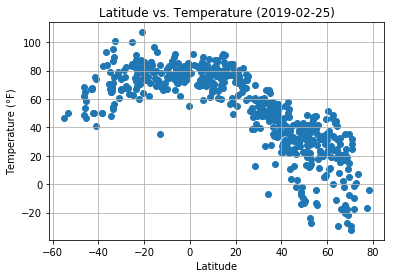

In [33]:
#Latitude vs Max Temperature Scatter Plot
plt.scatter(cities_df["Lat"],cities_df["Max Temp"],marker ="o")
plt.title("Latitude vs. Temperature (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Temperature (°F)")
plt.grid(True)
plt.savefig("latitude_vs_temp_scatter_plot.png")
plt.show()

#### Latitude vs. Humidity Plot

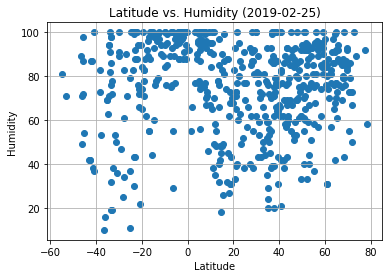

In [34]:
#Latitude vs Humidity Scatter Plot
plt.scatter(cities_df["Lat"],cities_df["Humidity"],marker ="o")
plt.title("Latitude vs. Humidity (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Humidity")
plt.grid(True)
plt.savefig("latitude_vs_humidity_scatter_plot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

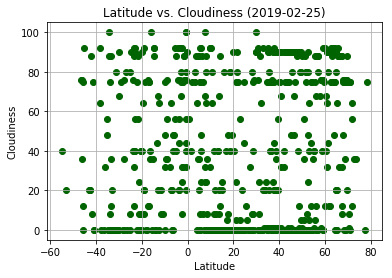

In [35]:
#Latitude vs Cloudiness Scatter Plot
plt.scatter(cities_df["Lat"],cities_df["Cloudiness"],marker ="o", color="darkgreen")
plt.title("Latitude vs. Cloudiness (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Cloudiness")
plt.grid(True)
plt.savefig("latitude_vs_cloudiness_scatter_plot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

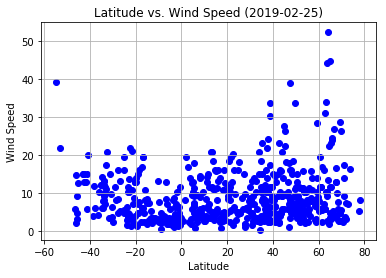

In [36]:
#Latitude vs Wind Speed Scatter Plot
plt.scatter(cities_df["Lat"],cities_df["Wind Speed"],marker ="o",color="blue")
plt.title("Latitude vs. Wind Speed (" + datetime.datetime.now().strftime('%Y-%m-%d') + ")")
plt.xlabel("Latitude", fontsize=10)
plt.ylabel("Wind Speed")
plt.grid(True)
plt.savefig("latitude_vs_wind_speed_scatter_plot.png")
plt.show()